In [1]:
print("hello world")

hello world


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


resize all images to this size

In [3]:
IMAGE_SIZE = [250, 250]


add preprocessing layer to the front of VGG


In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 0s 0us/step


don't train existing weights

In [5]:
for layer in vgg.layers:
  layer.trainable = False


 useful for getting number of classes


In [6]:
folders = glob('/content/drive/MyDrive/players_data/train_data/*')


In [7]:
x = Flatten()(vgg.output)


In [8]:
prediction = Dense(len(folders), activation='softmax')(x)


create a model object


In [9]:
model = Model(inputs=vgg.input, outputs=prediction)



view the structure of the model


In [10]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

tell the model what cost and optimization method to use


In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator


In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)


In [16]:

test_datagen = ImageDataGenerator(rescale = 1./255)


In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/players_data/train_data',
                                                 target_size = (250, 250),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')



Found 462 images belonging to 15 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/players_data/test_data',
                                            target_size = (250, 250),
                                            batch_size = 128,
                                            class_mode = 'categorical')


Found 114 images belonging to 15 classes.


fit the model


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
4/4 [==============================] - 185s 44s/step - loss: 3.4712 - accuracy: 0.0883 - val_loss: 3.8640 - val_accuracy: 0.1404
Epoch 2/20
4/4 [==============================] - 10s 2s/step - loss: 3.0868 - accuracy: 0.2192 - val_loss: 3.2300 - val_accuracy: 0.2018
Epoch 3/20
4/4 [==============================] - 10s 3s/step - loss: 2.3133 - accuracy: 0.4426 - val_loss: 2.6179 - val_accuracy: 0.2719
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 1.7430 - accuracy: 0.4664 - val_loss: 2.5863 - val_accuracy: 0.2895
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 1.4486 - accuracy: 0.5750 - val_loss: 2.4385 - val_accuracy: 0.3158
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 1.2919 - accuracy: 0.6431 - val_loss: 2.2823 - val_accuracy: 0.3860
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.9488 - accuracy: 0.7659 - val_loss: 2.1851 - val_accuracy: 0.4035
Epoch 8/20
4/4 [================

loss

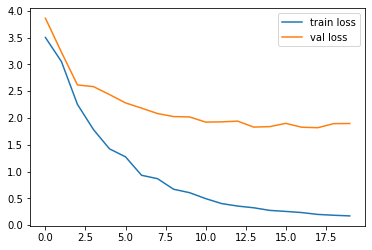

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


accuracies

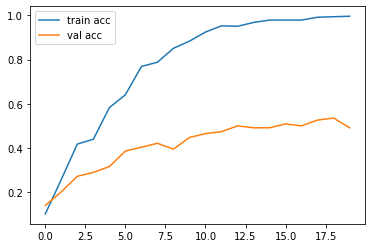

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
